# **Assignment 1 : Notebook 2**

# **Dataset: Light Rail Patronage**

# **Hypothesis testing**

While hypothesis testing isn't strictly necessary before every time series forecasting task, it can play a crucial role in several crucial steps, making it a valuable practice in many cases. Here's why:

**1. Understanding Data Characteristics:**

Stationarity Test: Hypothesis testing helps us check for stationarity, a key requirement for many forecasting models. It allows us to reject the null hypothesis of non-stationarity and ensure the data's statistical properties remain constant over time, improving model accuracy.
Trends and Seasonality: Testing for trends and seasonality through hypothesis testing lets us confirm their presence and guide us in choosing appropriate forecasting methods or transformations.

**2. Model Selection and Improvement:**

Feature Selection: Identifying statistically significant features through tests helps eliminate irrelevant ones, reducing model complexity and improving its interpretability and accuracy.
Model Parameterization: Testing different model parameters and comparing their performance against null hypotheses allows us to select the optimal configurations for our forecasts.

**3. Evaluating Forecast Validity:**

Confidence Intervals: Hypothesis testing informs the construction of confidence intervals around forecasts, quantifying the uncertainty associated with our predictions. This transparency is crucial for decision-making based on the forecasts.
Model Comparison: Testing the null hypothesis that two forecasting models perform equally well helps us objectively compare different options and select the most reliable one.


**4. Avoiding Pitfalls:**

Identifying Spurious Relationships: Tests can help us avoid being misled by chance correlations or random patterns in the data, improving the overall quality and reliability of our forecasts.
Overfitting: Testing different model complexities against null hypotheses prevents overfitting, where the model memorizes the specific data instead of capturing generalizable patterns for future prediction.

# **Hypothesis building for stationarity**


In time series analysis, the distinction between stationary and non-stationary data is crucial! It all boils down to the stability of statistical properties over time.

**Stationary time series behave like well-mannered guests at a party. They maintain a consistent character throughout, meaning:**

**Mean and variance remain constant:** No upward or downward trends, and the spread of data points stays the same. Imagine a plate of cookies where the average size and the variation in sizes stay roughly the same over time.

**Autocorrelation fades over time:** The dependence of a data point on its past values weakens as you go further back. Think of conversations at the party; references to what someone said five minutes ago are less likely than to what they just said.

**Non-stationary time series are vice-versa.Their statistical properties fluctuate, making them trickier to analyze and model:**



**Trending mean or variance:** bold textThe data exhibits a clear upward or downward drift, or its spread changes over time. Picture a stack of cookies gradually growing or shrinking throughout the party.

**Persistent autocorrelation:** The influence of past values lingers, meaning distant data points can still significantly impact current ones. Imagine party gossip spreading long after the initial source, influencing conversations throughout the night.
Here's a table summarizing the key differences:

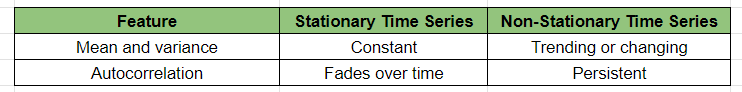

# **Why does Stationarity matters?**

Stationarity is important for several reasons:

**Reliable analysis:** Stationary data allows for the use of simpler and more reliable statistical methods for analysis and forecasting. Non-stationary data can lead to misleading results.

**Model stability:** Models built on stationary data are more likely to be stable and accurate over time. Non-stationary data can lead to models that quickly become outdated.

**Easier interpretation:** Stationary data is easier to interpret and understand, as its patterns and relationships are consistent. Non-stationary data can be more complex and challenging to decipher.
So, how do you handle non-stationary data?

There are ways to transform non-stationary data into stationary form. Common techniques include:

**Differencing:** This involves taking the difference between consecutive data points, often removing trends and seasonality. Think of it as calculating the change in cookie stack size between each observation.

**Logarithmic transformation:** This can stabilize the variance of non-stationary data, making it more predictable. Imagine plotting cookie sizes on a logarithmic scale to compress the spread.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("/content/Data.csv")
data=data.drop(["MyWay","Paper Ticket"],axis=1)
data=data.reset_index()

In [6]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data["Total"])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(total):
    result=adfuller(total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [7]:
adfuller_test(data['Total'])

ADF Test Statistic : -3.586004119231434
p-value : 0.006034305708287155
#Lags Used : 21
Number of Observations Used : 1699
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


**Plotting the total Patronages**

<Axes: >

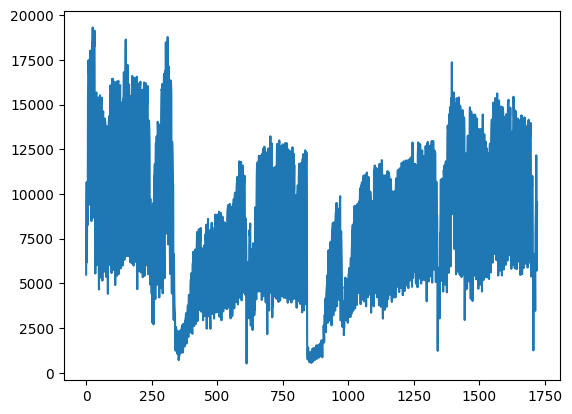

In [8]:
data['Total'].plot()